# Amazon Top 50 Bestselling Books 2009 - 2019 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('Amazone books best sellers.csv')

In [4]:
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [5]:
df.rename(columns={'User Rating':"UserRating"},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        550 non-null    object 
 1   Author      550 non-null    object 
 2   UserRating  550 non-null    float64
 3   Reviews     550 non-null    int64  
 4   Price       550 non-null    int64  
 5   Year        550 non-null    int64  
 6   Genre       550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
df.describe()

,UserRating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
df['Author'].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

In [9]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [10]:
df.groupby(['Name','Author','Genre'],as_index=False)[['Reviews','Price']].mean().sort_values('Reviews',ascending=False).head(10)

,Name,Author,Genre,Reviews,Price
342,Where the Crawdads Sing,Delia Owens,Fiction,87841.0,15.000000
248,The Girl on the Train,Paula Hawkins,Fiction,79446.0,12.500000
30,Becoming,Michelle Obama,Non Fiction,61133.0,11.000000
104,Gone Girl,Gillian Flynn,Fiction,57271.0,9.666667
240,The Fault in Our Stars,John Green,Fiction,50482.0,11.500000
280,The Nightingale: A Novel,Kristin Hannah,Fiction,49288.0,11.000000
88,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,Fiction,47265.0,14.000000
276,The Martian,Andy Weir,Fiction,39459.0,9.000000
19,All the Light We Cannot See,Anthony Doerr,Fiction,36348.0,14.000000
220,The Alchemist,Paulo Coelho,Fiction,35799.0,39.000000


In [20]:
dfByAuthor = df.groupby(['Author','Genre'],as_index=False)[['Reviews','UserRating','Price']].mean()
dfByAuthor.sort_values('Reviews',ascending=False).head(20)

,Author,Genre,Reviews,UserRating,Price
69,Delia Owens,Fiction,87841.000000,4.800000,15.000000
181,Paula Hawkins,Fiction,79446.000000,4.100000,12.500000
169,Michelle Obama,Non Fiction,61133.000000,4.800000,11.000000
101,Gillian Flynn,Fiction,57271.000000,4.000000,9.666667
143,Kristin Hannah,Fiction,49288.000000,4.800000,11.000000
129,John Green,Fiction,42083.800000,4.660000,10.600000
15,Andy Weir,Fiction,39459.000000,4.700000,9.000000
21,Anthony Doerr,Fiction,36348.000000,4.600000,14.000000
183,Paulo Coelho,Fiction,35799.000000,4.700000,39.000000
72,Donna Tartt,Fiction,33844.000000,3.900000,20.000000


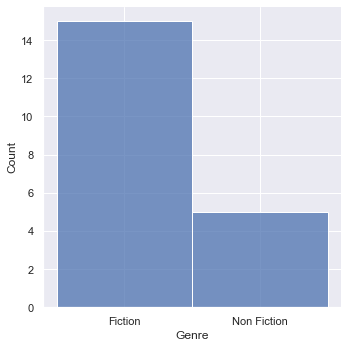

In [12]:
sns.set_theme()
sns.displot(dfByAuthor.sort_values('Reviews',ascending=False).head(20)['Genre'])

### Scatterplot on authors/review

(22001.0, 97841.0)

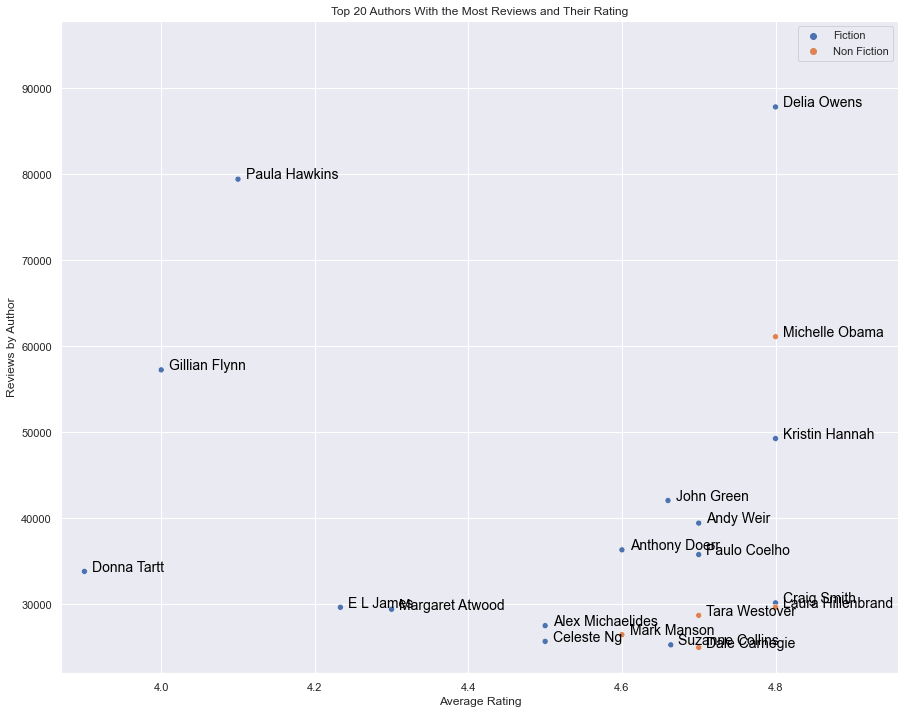

In [24]:
df_scatter = dfByAuthor.sort_values('Reviews',ascending=False).head(20)
df_scatter.reset_index(inplace=True)
plt.figure(figsize=(15,12))

sns.set_theme()
sns.scatterplot(data=df_scatter,x='UserRating',y='Reviews',hue='Genre',sizes=12)

plt.title('Top 20 Authors With the Most Reviews and Their Rating')
plt.xlabel('Average Rating')
plt.ylabel('Reviews by Author')
plt.legend(loc='best')

for i in range(df_scatter.shape[0]):
    plt.text(x=df_scatter.UserRating[i]+0.01,y=df_scatter.Reviews[i]+1,s=df_scatter.Author[i],
             fontdict=dict(color='black',size=14))
    
plt.xlim(df_scatter.UserRating.min()-0.03,df_scatter.UserRating.max()+0.16)
plt.ylim(df_scatter.Reviews.min()-3000,df_scatter.Reviews.max()+10000)

In [26]:
dfByBook = df.groupby(['Name','Genre'],as_index=False)[['Reviews','UserRating','Price']].mean()
TopRatedBooks = dfByBook[dfByBook['UserRating']==4.9]
TopRatedBooks

,Name,Genre,Reviews,UserRating,Price
36,"Brown Bear, Brown Bear, What Do You See?",Fiction,14344.0,4.9,5.0
66,Dog Man and Cat Kid: From the Creator of Capta...,Fiction,5062.0,4.9,6.0
67,Dog Man: A Tale of Two Kitties: From the Creat...,Fiction,4786.0,4.9,8.0
68,Dog Man: Brawl of the Wild: From the Creator o...,Fiction,7235.0,4.9,4.0
69,Dog Man: Fetch-22: From the Creator of Captain...,Fiction,12619.0,4.9,8.0
70,Dog Man: For Whom the Ball Rolls: From the Cre...,Fiction,9089.0,4.9,8.0
71,Dog Man: Lord of the Fleas: From the Creator o...,Fiction,5470.0,4.9,6.0
108,"Goodnight, Goodnight Construction Site (Hardco...",Fiction,7038.0,4.9,7.0
112,Hamilton: The Revolution,Non Fiction,5867.0,4.9,54.0
116,Harry Potter and the Chamber of Secrets: The I...,Fiction,19622.0,4.9,30.0


Text(0.0, 1.0, 'Books with the Highest User Rating and their Reviews')

C:\Users\lukia\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lukia\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


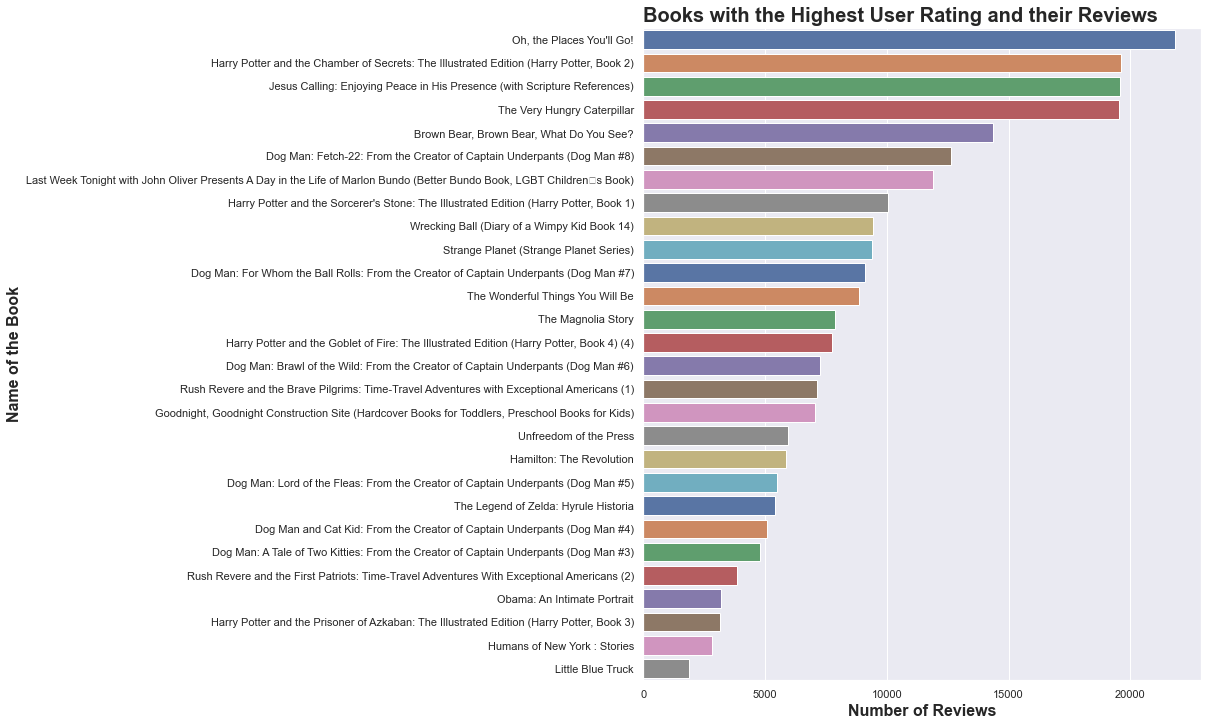

In [100]:
plt.figure(figsize=(10,12))
sns.barplot(data=TopRatedBooks.sort_values('Reviews',ascending=False),y='Name',x='Reviews',palette='deep')

plt.xlabel('Number of Reviews',fontdict={'weight':'bold','size': 16})
plt.ylabel('Name of the Book',fontdict={'weight':'bold','size': 16})
plt.title('Books with the Highest User Rating and their Reviews',fontdict={'weight':'bold','size': 20},loc='left')

In [50]:
booksByName = df.groupby(['Name','Genre'],as_index=False)['Price','UserRating'].mean().sort_values('Price',ascending=False)

C:\Users\lukia\AppData\Local\Temp/ipykernel_3368/2498032927.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  booksByName = df.groupby(['Name','Genre'],as_index=False)['Price','UserRating'].mean().sort_values('Price',ascending=False)


In [51]:
booksByName['Genre'].value_counts()

Non Fiction    191
Fiction        160
Name: Genre, dtype: int64

([<matplotlib.patches.Wedge at 0x2034dc6dc40>,
 [Text(-1.08943146742663, -0.15211534367268648, 'Non Fiction'),
  Text(1.08943146742663, 0.15211534367268637, 'Fiction')],
 [Text(-0.4951961215575591, -0.0691433380330393, '54.415953159332275'),
  Text(0.4951961215575591, 0.06914333803303925, '45.584046840667725')])

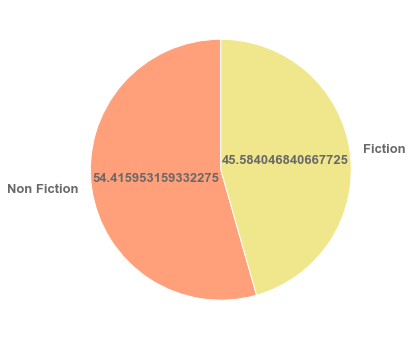

In [115]:
plt.figure(figsize=(8,6))
plt.pie(x=booksByName['Genre'].value_counts(),labels=booksByName['Genre'].value_counts().index,
        autopct=str,startangle=90,textprops={'size': 13,'color':'dimgrey','weight':'bold'},colors=['lightsalmon','khaki'],
       pctdistance=0.5)